# Bagging and Its Variants


## Bagging (Bootstrap Aggregating)

Bagging, or Bootstrap Aggregating, is an ensemble method designed to improve the stability and accuracy of machine learning algorithms. It reduces variance by averaging the predictions from multiple models, thereby preventing overfitting.

### Mathematical Formulation

Consider a dataset $D = \{ (\mathbf{x}_i, y_i) \}_{i=1}^N$ where $\mathbf{x}_i \in \mathbb{R}^d$ represents the feature vector and $y_i$ the corresponding label. The goal of bagging is to train multiple models on different bootstrap samples of this dataset and then combine their predictions.

#### Bootstrap Sampling

From the original dataset $D$, we create $M$ different datasets $D_1, D_2, \dots, D_M$ by sampling with replacement. Each dataset $D_m$ has the same size as $D$, but due to the replacement, some samples may appear multiple times, and others not at all.

#### Training Multiple Models

For each bootstrap sample $D_m$, a model $h_m(\mathbf{x})$ is trained. The models can be of the same type (e.g., decision trees) or different types.

#### Aggregation of Predictions

For a new input $\mathbf{x}$, the final prediction is obtained by averaging the predictions of all $M$ models (for regression) or taking a majority vote (for classification):

$$
\hat{y} = \frac{1}{M} \sum_{m=1}^M h_m(\mathbf{x})
$$

For classification, if the output of each model $h_m(\mathbf{x})$ is binary, the final prediction is:

$$
\hat{y} = 	\text{sign} \left( \sum_{m=1}^M h_m(\mathbf{x})\right)
$$

### Variance Reduction through Bagging

Bagging helps reduce the variance of the model's predictions. If $\sigma^2$ is the variance of an individual model, the variance of the ensemble's prediction can be reduced as:

$$
	\text{Var}(\hat{y}) = \frac{1}{M} \sigma^2
$$

This is because averaging multiple predictions tends to cancel out the errors (assuming the errors are uncorrelated), leading to a more stable and reliable model.

#### Example: Variance Reduction Illustration

Consider the following simulation where we demonstrate the effect of bagging on variance reduction.


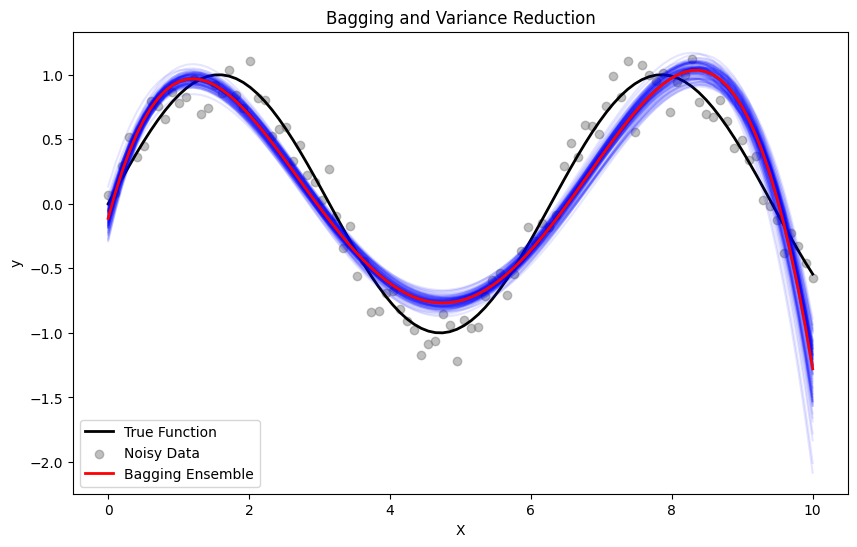

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Simulating variance reduction
np.random.seed(42)
M = 100  # number of models
N = 100  # number of data points
true_variance = 0.02

# Generate true data
X = np.linspace(0, 10, N)
true_function = np.sin(X)
noise = np.random.normal(0, np.sqrt(true_variance), N)
y = true_function + noise

# Bootstrap and train multiple models
predictions = np.zeros((M, N))
for m in range(M):
    indices = np.random.choice(N, N, replace=True)
    X_sample = X[indices]
    y_sample = y[indices]
    # Simple model: polynomial regression
    coefficients = np.polyfit(X_sample, y_sample, 4)
    predictions[m] = np.polyval(coefficients, X)

# Ensemble prediction: average of all models
ensemble_prediction = np.mean(predictions, axis=0)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X, true_function, label='True Function', color='black', linewidth=2)
plt.scatter(X, y, label='Noisy Data', color='gray', alpha=0.5)
for m in range(M):
    plt.plot(X, predictions[m], color='blue', alpha=0.1)
plt.plot(X, ensemble_prediction, label='Bagging Ensemble', color='red', linewidth=2)
plt.legend()
plt.title("Bagging and Variance Reduction")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



## Random Forests

Random Forests is a powerful variant of bagging where the base models are decision trees. The random forest algorithm introduces additional randomness in the model training process, which further decorrelates the trees and improves the ensemble's performance.

### How Random Forests Work

1. **Bootstrap Sampling:** Just like bagging, random forests start with bootstrap samples of the original dataset.
2. **Random Feature Selection:** At each split in a decision tree, a random subset of features is selected, and the best split is chosen only from this subset. This randomness reduces the correlation between trees and leads to a more diverse ensemble.
3. **Aggregation:** The predictions of all trees are averaged (for regression) or a majority vote is taken (for classification) to produce the final output.

### Mathematical Formulation

Let $\mathcal{F}$ denote the feature space. At each node of a decision tree, a subset $\mathcal{F}_m \subset \mathcal{F}$ of features is chosen randomly, and the best split is determined based on $\mathcal{F}_m$.

The prediction for a new input $\mathbf{x}$ is:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(\mathbf{x})
$$

where $T$ is the number of trees, and $h_t(\mathbf{x})$ is the prediction of the $t$-th tree.

#### Example: Random Forests with Scikit-Learn

Let's implement a random forest using Scikit-Learn.


In [2]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')


Random Forest Classifier Accuracy: 1.00



## Conclusion

In this section, we have explored the details of bagging and its variant, random forests. We have seen how bagging reduces variance and how random forests introduce additional randomness to improve ensemble performance.

### Summary:
- **Bagging**: Reduces variance by averaging predictions from multiple models trained on different bootstrap samples.
- **Random Forests**: A variant of bagging that uses decision trees and introduces randomness in feature selection to improve model decorrelation.

### Exercises
1. Implement a bagging ensemble using a different base model (e.g., SVM) and compare its performance with that of a single model.
2. Explore the effect of different numbers of trees in a random forest on its performance. What happens when the number of trees is too small or too large?
3. Modify the random forest example to use regression trees instead of classification trees. How does the performance change?

These exercises will help solidify your understanding of bagging and random forests.
